# Data analysis for Travel Insurance Company
**A travel insurance company**

**What is the objective?**
Due to COVID, marketing campaign has been reduced by 50% and now it is more important that ever that they advertise to right audience in the right place.

For this reason, the company stackholders want to have an answer to the following two business questions based on the data provided.

1) Are there differences in the travel habits between customers and non-customers?
2) What is the typical profile of customers and non-customers?


## Data Validation

The data provided must contain 9 columns with the correspoding data types as described below:

![Column Descriptions](Column%20Descriptions.png)

**Let's validate!**

In [1]:
# Importing python modules for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# loading dataset
data = pd.read_csv('travel_insurance.csv')

# Showing first 5 records
data.head(5)


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
# Showing last 5 records
data.tail(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1
1986,34,Private Sector/Self Employed,Yes,500000,4,0,No,No,0


In [4]:
# Showing dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


**_Findings:_**
- No null values for the columns
- 9 colums as expected
- Correct data type for each columns: numeric or character 

_Now that we are sure that the data is in good shape for analsysis let's start to explore the characteristics of each feature/column, in order to find patterns and relationships._

## Exploratory Analysis

In this part of the analysis process I will get to know the data better by looking for 

In [5]:
# Showing statistics about numeric columns
data.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


### **_Findings_**
Below we can find a bullet point with the characteristic, plus a graph so, it is easier to understand the concept

_NUMERICAL FEATURES_

In [6]:
palette = sns.color_palette(['#004F5F', '#F9F871','#38C7A6' ,'#36E9FE' ,'#766AAF', '#9b6973', '#ce7ea2','#ffe28a'])
sns.set_palette(palette)
datalabel_color = 'white'

- **Median age** is **29** and the **range** goes **from 25 to 35 years old**

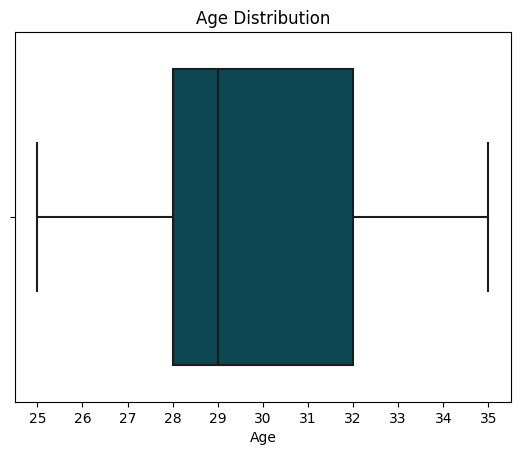

In [7]:
sns.boxplot(data=data, x='Age')
plt.title('Age Distribution')
plt.xticks(np.arange(np.min(data.Age), np.max(data.Age) + 1))
plt.savefig('Age Distribution of Population.png')
plt.show()

- **Minimun** Annual **income** is **300,000** (currency is not defined) with a **median** of **900,000**


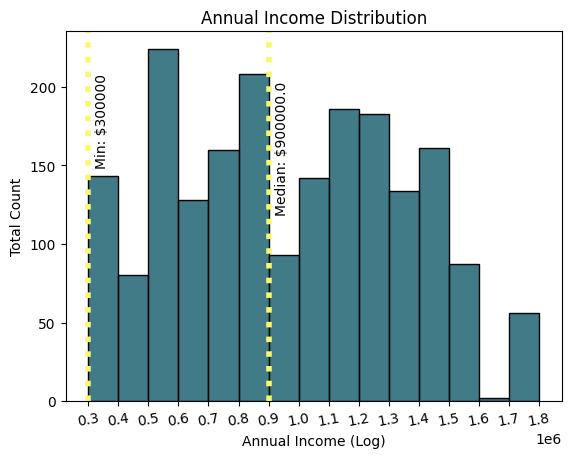

In [8]:
# Variable to be used in this graph
min_income = np.min(data.AnnualIncome)
median_income = np.median(data.AnnualIncome)
n_buckets = 15
Annual_Income_buckets = np.linspace(np.min(data.AnnualIncome), np.max(data.AnnualIncome), n_buckets + 1)

# Plot
sns.histplot(data=data, x='AnnualIncome', bins=n_buckets, color=palette[0])#, color='gray')
plt.axvline(median_income, linestyle=':', linewidth=4, color=palette[1])
plt.axvline(min_income, linestyle=':', linewidth=4, color=palette[1])
plt.xticks(Annual_Income_buckets, rotation=10)

# Labels
plt.title("Annual Income Distribution")
plt.xlabel('Annual Income (Log)')
plt.ylabel('Total Count')
plt.text(median_income * 1.025, 120, 'Median: $'+str(median_income), rotation='vertical')
plt.text(min_income * 1.07, 150, 'Min: $'+str(min_income), rotation='vertical')

plt.savefig('Population_Annual Income Distribution.png')
plt.show()

- Every person in this data **has at least 2 family members living with him/her** being **4 family members** the **most frequent**


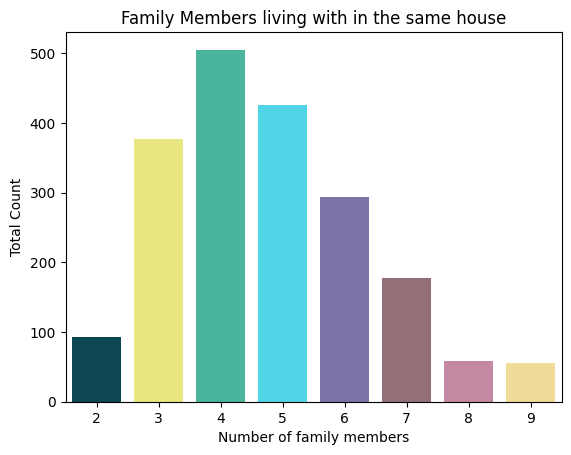

In [9]:
# Plot
sns.countplot(data=data, x='FamilyMembers', palette=palette)#, color='gray')

#Labels
plt.title('Family Members living with in the same house')
plt.xlabel('Number of family members')
plt.ylabel('Total Count')

plt.savefig('Population_Family Members.png')
plt.show()

- Only **27.78%** of the population in this data **has a Chronic Disease**


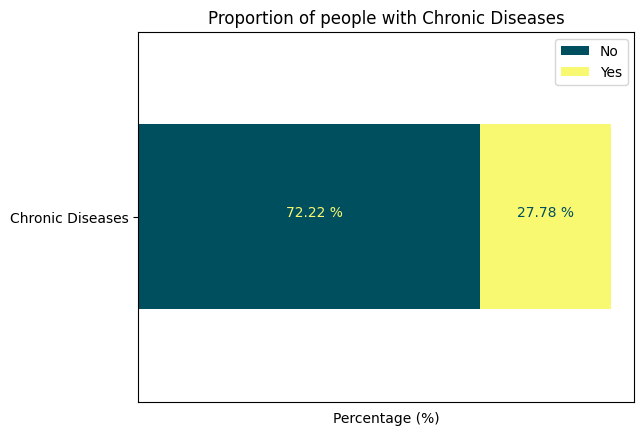

In [10]:
# Replace 0 with No and 1 with Yes
# Also multiplying distribution by 100 to improve percentage readability on the chart
ChronicDiseases_proportion = data.ChronicDiseases\
	.replace({0:'No', 1:'Yes'})\
    .value_counts(normalize=True) * 100

# Preparing data for a stacked bar chart
ChronicDiseases_proportion = pd.DataFrame(ChronicDiseases_proportion)\
			.transpose()\
			.rename({'ChronicDiseases':'Chronic Diseases'})
ChronicDiseases_Yes = np.round(ChronicDiseases_proportion['Yes'].values[0], 2)
ChronicDiseases_No = np.round(ChronicDiseases_proportion['No'].values[0], 2)

# Plot
ChronicDiseases_proportion.plot(kind='barh', stacked=True)

# Labels
plt.title('Proportion of people with Chronic Diseases')
plt.xlabel('Percentage (%)')
plt.xticks([])
plt.text( 100 - ChronicDiseases_Yes + (ChronicDiseases_Yes / 3.5), 0, str(ChronicDiseases_Yes) + " %", color=palette[0])
plt.text( 100 - ChronicDiseases_No + 3.5, 0, str(ChronicDiseases_No) + " %", color=palette[1])

plt.savefig('Population_Chronic Disease Proportion.png')
plt.show()

- And, only **35.73%** has **bought travel insurance** from _Travel Assured_ 

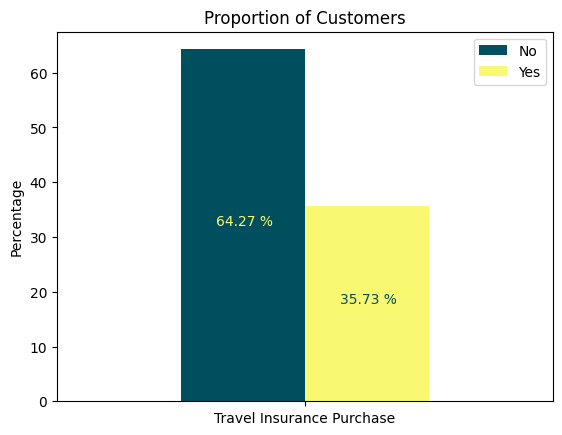

In [11]:
# Replace 0 with No and 1 with Yes
# Also multiplying distribution by 100 to improve percentage readability on the chart
Bought_TravelInsurance_proportion = data.TravelInsurance\
	.replace({0:'No', 1:'Yes'})\
    .value_counts(normalize=True) * 100

# Preparing data for a stacked bar chart
Bought_TravelInsurance_proportion = pd.DataFrame(Bought_TravelInsurance_proportion)\
			.transpose()\
			.rename({'TravelInsurance':'Travel Insurance Purchase'})
Bought_TravelInsurance_Yes = np.round(Bought_TravelInsurance_proportion['Yes']\
                                      .values[0], 2)
Bought_TravelInsurance_No = np.round(Bought_TravelInsurance_proportion['No']\
                                     .values[0], 2)

# Plot
Bought_TravelInsurance_proportion.plot(kind='bar')

# Labels
plt.title('Proportion of Customers')
plt.ylabel('Percentage')
plt.xticks(rotation=360)
plt.text(0.07, Bought_TravelInsurance_Yes /2, str(Bought_TravelInsurance_Yes)+' %', color=palette[0])
plt.text(-0.18, Bought_TravelInsurance_No /2, str(Bought_TravelInsurance_No)+' %', color=palette[1])

plt.savefig('Population_Proportion of customers.png')
plt.show()


Now that we have a clear understanding of the characteristic of the features including numerical data types, **let's now explore categorical features**.

At this point it important to note that **exploring this data enough** in the early stages of the analysis **will help us answer the business question more concisely**. **Let's continue!**

_CATEGORICAL FEATURES_

In [12]:
data.head(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Here I will add another column to verify if the person works for the Goverment this way, I will be able to plot it along with other categories that that labelled as Yes or No answers

In [13]:
data['Empl_Goverment Sector'] = data['Employment Type'] == 'Government Sector'
data['Empl_Goverment Sector'].replace({True: 'Yes', False:'No'}, inplace=True)
data[['Empl_Goverment Sector']].head()

,Empl_Goverment Sector
0,Yes
1,No
2,No
3,No
4,No


In [14]:
def get_proportions(df, col_name):
    """This functions takes a pandas DataFrame and a column name and return the proportion for the categories in that column"""
    proportions = df[col_name].value_counts(normalize=True) * 100
    return proportions

In [15]:
# Proportions of Yes or No Answers
Graduate_Prop = get_proportions(data,'GraduateOrNot')
Frequent_Flyer_Prop = get_proportions(data,'FrequentFlyer')
EverTravelledAbroad_Prop = get_proportions(data,'EverTravelledAbroad')
Employment_Gov_Prop = get_proportions(data,'Empl_Goverment Sector')

# Set Yes or No Answers as DataFrame so I can merge by Yes / No and then plot it
Graduate_Prop = pd.DataFrame(Graduate_Prop)
Frequent_Flyer_Prop = pd.DataFrame(Frequent_Flyer_Prop)
EverTravelledAbroad_Prop = pd.DataFrame(EverTravelledAbroad_Prop)
Employment_Gov_Prop = pd.DataFrame(Employment_Gov_Prop)

# Merge the dataframes that I just created
Yes_No_Anwer_Prop = Graduate_Prop\
	.merge(Frequent_Flyer_Prop, left_index=True, right_index=True)\
	.merge(EverTravelledAbroad_Prop, left_index=True, right_index=True)\
	.merge(Employment_Gov_Prop,  left_index=True, right_index=True)
Yes_No_Anwer_Prop

,GraduateOrNot,FrequentFlyer,EverTravelledAbroad,Empl_Goverment Sector
Yes,85.153498,20.986412,19.124308,28.686462
No,14.846502,79.013588,80.875692,71.313538


hola


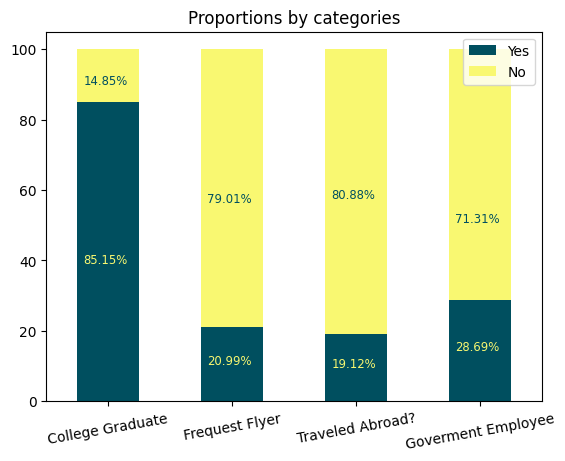

In [16]:
# Renaming colum names so it is easier to understand in the chart
Yes_No_Anwer_Prop.columns = ['College Graduate', 'Frequest Flyer', 'Traveled Abroad?', 'Goverment Employee']

# Plot
Yes_No_Anwer_Prop.transpose().plot(kind='bar', stacked=True)

# Labels
plt.xticks(rotation=10)  
plt.title('Proportions by categories')

x_datalabel = 0.2

for index, value in enumerate(Yes_No_Anwer_Prop.columns):
    # Flip data labels if Yes is greater than 50 so it goes to the right position in the chart
    if Yes_No_Anwer_Prop[value]['Yes'] > 50:
        print('hola')
        plt.text(index - x_datalabel, 100 - Yes_No_Anwer_Prop[value]['Yes'] / 1.4,	str(np.round(Yes_No_Anwer_Prop[value]['Yes'],2))+'%', color=palette[1], fontsize='small')
        plt.text(index - x_datalabel, 100 - Yes_No_Anwer_Prop[value]['No'] / 1.5 ,str(np.round(Yes_No_Anwer_Prop[value]['No'],2))+'%',color=palette[0], fontsize='small') 
        continue # Go to the next iteration
    
    
    # Set labels normally, because Yes is not greater than 50%
    plt.text(index - x_datalabel, Yes_No_Anwer_Prop[value]['Yes'] / 2, str(np.round(Yes_No_Anwer_Prop[value]['Yes'],2))+'%',color=palette[1], fontsize='small')
    
    plt.text(index - x_datalabel, Yes_No_Anwer_Prop[value]['No'] / 1.4, str(np.round(Yes_No_Anwer_Prop[value]['No'],2))+'%',color=palette[0], fontsize='small')

plt.savefig('Population_Proportion by Category.png')
plt.show()


### _**Findings**_

The data is from people who:
- **85.15 %** of all the people finished college.
- **79.01 %** of all the people flies frequently.
- **80.88 %** of all the people has traveled abroad, at least once. 
- **71.31 %** of all the people works for the Goverment.

In order to the this nice looking stacked chart, I had to do the following:
- Create a column to know wether the person is a Goverment employee
- Get the proportion if Yes/No by each category
- Transform each Pandas Series to a Pandas DataFrame
- Merge those DataFrames by the Index, in this case: Yes, No
- Rename the columns 
- Set a condition so, the labels are placed in the correct location. In cases like: Collegue graduate, number of Non-Graduates is less than Graduates (label had to be flipped from botton to top)

## Response to business questions

First of all, **let's split our dataset** so, we can find pattern in those who are **customers vs non-customers**

In [17]:
data_Customers = data[data['TravelInsurance'] == 1]
data_NonCustomers = data[data['TravelInsurance'] == 0]

In [18]:
data_NonCustomers.FrequentFlyer.value_counts()

No     1099
Yes     178
Name: FrequentFlyer, dtype: int64

In [19]:
get_proportions(data_Customers, 'FrequentFlyer')

No     66.338028
Yes    33.661972
Name: FrequentFlyer, dtype: float64

In [20]:
get_proportions(data_NonCustomers, 'FrequentFlyer')

No     86.061081
Yes    13.938919
Name: FrequentFlyer, dtype: float64

**Question**                                                                
**1) Are there differences in the travel habits between customers and non-customers?**

C:\Users\dajeu\AppData\Local\Temp\ipykernel_9128\4076714875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel_habits['Travel Insurance'].replace({0:'No', 1:'Yes'}, inplace=True)


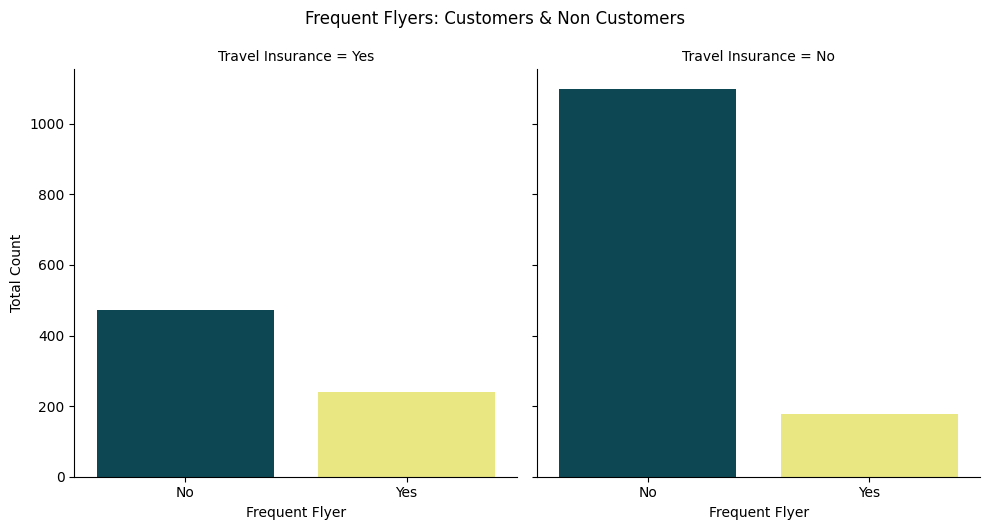

In [21]:
travel_habits = data[['TravelInsurance', 'FrequentFlyer']]
travel_habits.columns = ['Travel Insurance', 'Frequent Flyer']
travel_habits['Travel Insurance'].replace({0:'No', 1:'Yes'}, inplace=True)

g = sns.catplot(kind='count', data=travel_habits, col='Travel Insurance', x='Frequent Flyer', col_order=['Yes', 'No'])
g.fig.suptitle('Frequent Flyers: Customers & Non Customers', y=1.05)
g.set_ylabels('Total Count')

plt.savefig('Comparison_Travel Habits.png')
plt.show()

### Answer:
The **travel habits** between customers and non customer **are very similar**. The mayority for both customers and non customers **do not tend to fly so often**.

- Customers: **66.34%** are _not Frequent flyers_ 471 out of 710
- Non-Customers: **86.06%** are _not Frequent flyers_ 1099 out of 1277

However, those who are customers tend to fly a little more.


**Question**                                                                
**2) What is the typical profile of customers and non-customers?**

First, let's view what's the **tipical family size** for both customer and non customers

In [22]:
data.rename(columns={
    'FamilyMembers':'Family Members',
	'TravelInsurance':'Travel Insurance'
}, inplace=True)
data['Travel Insurance'].replace({0:'No', 1:"Yes"}, inplace=True)
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,Family Members,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,Travel Insurance,Empl_Goverment Sector
0,31,Government Sector,Yes,400000,6,1,No,No,No,Yes
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,No,No
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,Yes,No
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,No,No
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,No,No


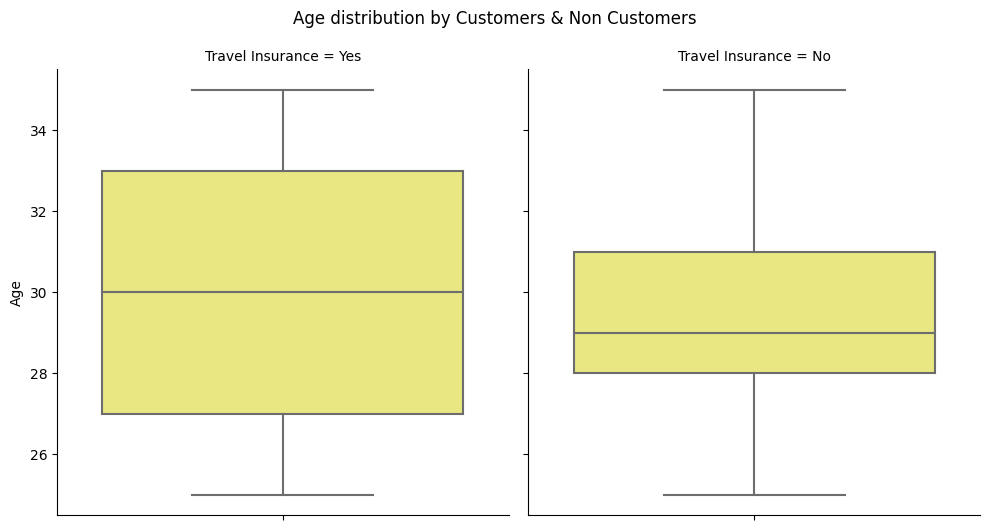

In [23]:
sns.set_palette(['dimgray'])
g = sns.catplot(data=data, kind='box', y='Age', col='Travel Insurance', col_order=['Yes', 'No'], color=palette[1])
g.fig.suptitle('Age distribution by Customers & Non Customers', y=1.05)

plt.savefig('Comparison_Age Distribution.png')

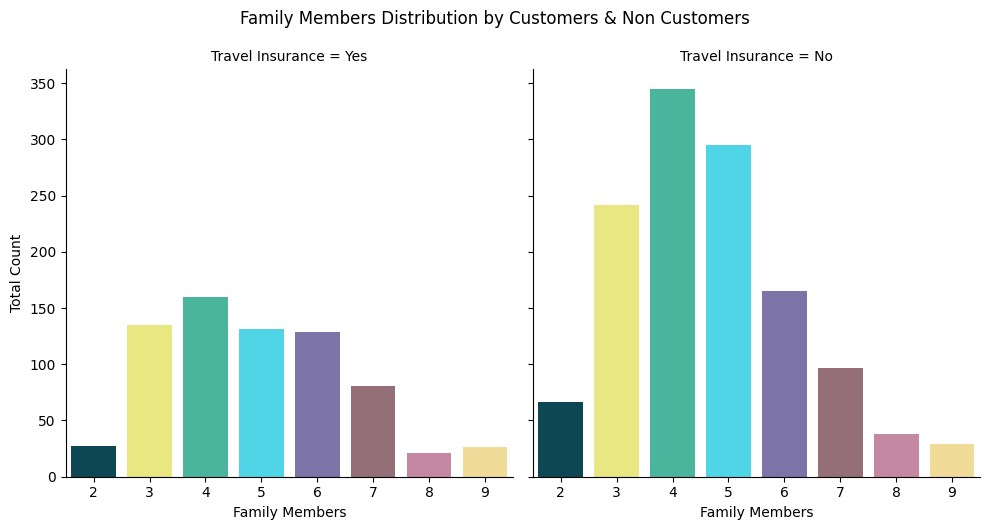

In [24]:
g = sns.catplot(data=data, kind='count', x='Family Members', col='Travel Insurance', col_order=['Yes', 'No'], palette=palette)
g.fig.suptitle('Family Members Distribution by Customers & Non Customers', y=1.05)
g.set_ylabels('Total Count')

plt.savefig('Comparison_Family Members Distribution.png')

In [25]:
type(g)

seaborn.axisgrid.FacetGrid

C:\Users\dajeu\AppData\Local\Temp\ipykernel_9128\1188836494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ChronicDiseases_data['ChronicDiseases'].replace({


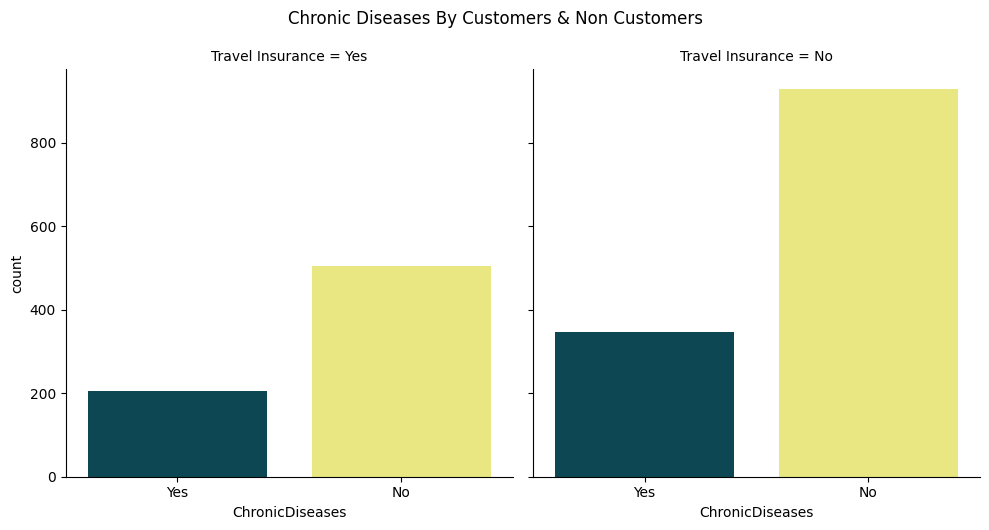

In [26]:
ChronicDiseases_data = data[['ChronicDiseases', 'Travel Insurance']]
ChronicDiseases_data['ChronicDiseases'].replace({
    0:'No', 1:'Yes'
}, inplace=True)
# ChronicDiseases_data = ChronicDiseases_data.groupby('Travel Insurance')['ChronicDiseases'].value_counts(normalize=True) * 100 

g = sns.catplot(data=ChronicDiseases_data, kind='count', x='ChronicDiseases', col='Travel Insurance', col_order=['Yes', 'No'], palette=palette)
g.fig.suptitle('Chronic Diseases By Customers & Non Customers', y=1.05)

plt.savefig('Comparison_Chronic Disease.png')


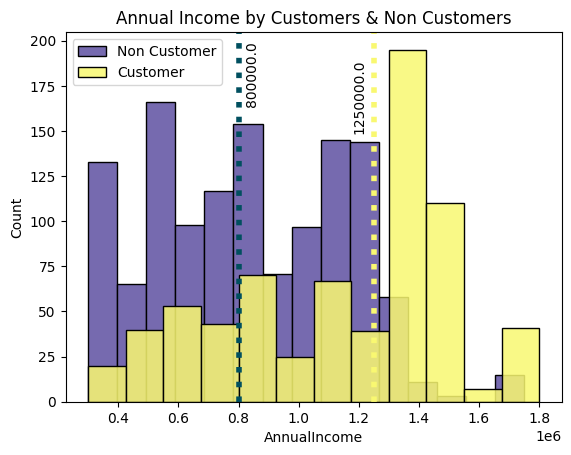

In [27]:
ax = sns.histplot(data=data_NonCustomers, x='AnnualIncome', alpha=1, color='#766AAF',label='Non Customer')

g = sns.histplot(data=data_Customers, x='AnnualIncome', alpha=0.85, color='#F9F871', label='Customer', ax = ax)
plt.legend()
plt.title('Annual Income by Customers & Non Customers')

Customers_median_income = np.quantile(data_Customers['AnnualIncome'], 0.5)
NonCustomers_median_income = np.quantile(data_NonCustomers['AnnualIncome'], 0.5)

# Median Labels
plt.text(Customers_median_income - 70000, 150, str(Customers_median_income), rotation='vertical')
plt.text(NonCustomers_median_income + 20000, 165, str(NonCustomers_median_income), rotation='vertical')

# Medians
plt.axvline(Customers_median_income, color=palette[1], linestyle=':',linewidth=4)
plt.axvline(NonCustomers_median_income, color=palette[0], linestyle=':',linewidth=4)

plt.savefig('Comparison_Annual Income.png')
plt.show()


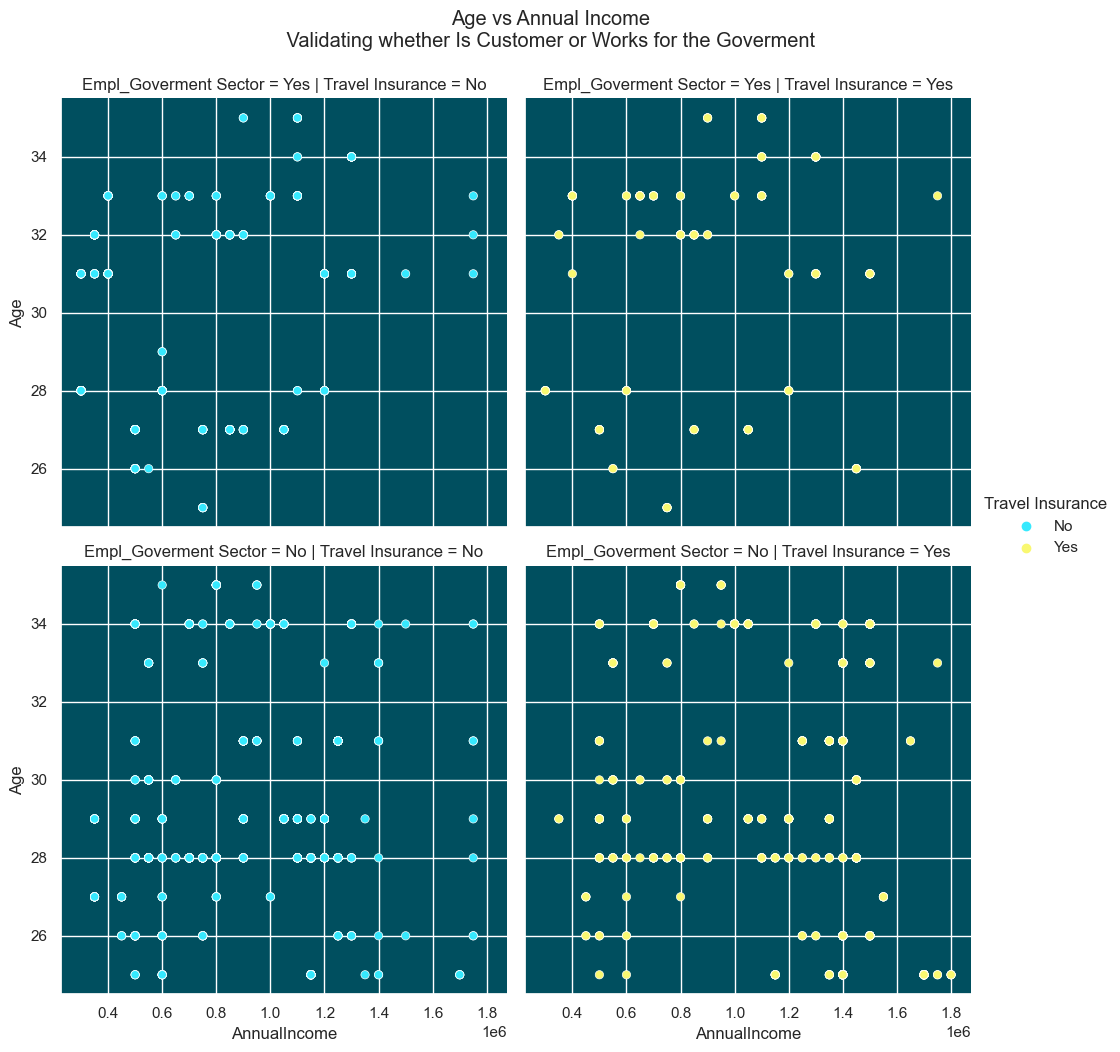

In [30]:
sub_palette = sns.color_palette([palette[3], palette[1]])
sns.set_context('notebook')

g = sns.relplot(kind='scatter', data=data, y='Age', x='AnnualIncome', hue='Travel Insurance',palette=sub_palette, col='Travel Insurance', row= 'Empl_Goverment Sector')#, size='Family Members')
g.fig.suptitle('Age vs Annual Income\n Validating whether Is Customer or Works for the Goverment ', y=1.05)

sns.set(rc={'axes.facecolor':palette[0], 'figure.facecolor':palette[0]})
plt.savefig('Comparison_Age Vs Income by Employment Type.png')

### Answer:
The **Tipilcal Profile** between for customers and non customer is:

_Customers_
- Tipical family size is of 4 family members. However the most frequents family size are from 3 to 5 members.
- The mayority do not suffer from a Chronic Disease. However, the proportion of Customer who suffer a Chronic Disease is higher compared to non Customers
- Median Annual Income is 1250000.00

_NonCustomers_
- Tipical family size is of 4 family members. However the range is almost evenly distributed from 3 to 6 family members
- The mayority do not suffer from a Chronic Disease. 
- Median Annual Incomme is 800000.00


# Recommendations

On the next marketing campaign the company could target the following people:
- Non Customer with family size from 3 to 5 members
- Annual income greater than or equal to 800000.00
- Between 27 to 33 years old (based on the mayority of customers)
- Who works in the private sector specially for the age range mentioned above

Also it is necessary to pay carefull attention to an increase in Frequent flyers because that could be an additional oportunity. At this moment, only **13.94%** of Non Customers are Frequent Flyers.